In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader

## Run 9

In [2]:
base_path ='../results/run9/'
figure_path = '../figures/'
dates = ['2010-04-30', '2012-12-31']
update_values = pd.read_pickle(base_path+'opt_results_df.pkl')
initial_budget = update_values.loc[1, 'Value']
update_values['Value2'] = update_values['Value'] - initial_budget
baseline = pd.read_pickle(base_path+'df_baseline.pkl').reset_index()
baseline['Date'] = baseline.Date.astype('str')
df = update_values.merge(baseline, left_on='Date', right_on='Date', how='inner')
df['Base'] = df['^GSPC'] - df.loc[0, '^GSPC']
df['ym'] = df.Date.map(lambda x: x[:7])
df

,Date,Value,AAPL,MSFT,AAL,WMT,Variance,Returns,Value2,^GSPC,Base,ym
0,2010-04-30,989.128792,104,0,24,0,388.63,108.19,0.000000,1186.689941,0.000000,2010-04
1,2010-05-31,1009.496501,82,0,44,0,2917.02,104.04,20.367709,1089.410034,-97.279907,2010-05
2,2010-06-30,984.357409,88,0,38,0,4438.38,74.03,-4.771383,1030.709961,-155.979980,2010-06
3,2010-07-30,1079.974344,88,0,38,0,5070.32,89.51,90.845552,1101.599976,-85.089966,2010-07
4,2010-08-31,972.443039,100,0,27,0,5694.28,48.89,-16.685753,1049.329956,-137.359985,2010-08
5,2010-09-30,1101.918595,100,0,27,0,7166.16,65.98,112.789804,1141.199951,-45.489990,2010-09
6,2010-10-29,1213.486134,84,0,36,1,9490.66,84.36,224.357342,1183.260010,-3.429932,2010-10
7,2010-11-30,1213.163567,100,0,25,0,7466.88,73.01,224.034775,1180.550049,-6.139893,2010-11
8,2010-12-31,1220.901918,100,0,25,0,6960.61,66.85,231.773127,1257.640015,70.950073,2010-12
9,2011-01-31,1269.959593,100,0,25,0,6797.73,67.81,280.830801,1286.119995,99.430054,2011-01


In [3]:
etf = DataReader('IVV', 'yahoo', dates[0], dates[1])
etf = etf.resample('BM').last()
etf = etf.reset_index()
etf['Date'] = etf['Date'].astype(str)
etf['Adj Close2'] = 10 * (etf['Adj Close'] - etf.loc[0, 'Adj Close'])
df = df.merge(etf, left_on='Date', right_on='Date', how='left')
df

,Date,Value,AAPL,MSFT,AAL,WMT,Variance,Returns,Value2,^GSPC,Base,ym,High,Low,Open,Close,Volume,Adj Close,Adj Close2
0,2010-04-30,989.128792,104,0,24,0,388.63,108.19,0.000000,1186.689941,0.000000,2010-04,121.389999,119.160004,121.260002,119.239998,4593400.0,94.725937,0.000000
1,2010-05-31,1009.496501,82,0,44,0,2917.02,104.04,20.367709,1089.410034,-97.279907,2010-05,111.019997,109.209999,111.019997,109.699997,6114900.0,87.147240,-75.786972
2,2010-06-30,984.357409,88,0,38,0,4438.38,74.03,-4.771383,1030.709961,-155.979980,2010-06,105.250000,103.250000,104.300003,103.459999,9757400.0,82.560822,-121.651154
3,2010-07-30,1079.974344,88,0,38,0,5070.32,89.51,90.845552,1101.599976,-85.089966,2010-07,111.230003,109.360001,109.580002,110.690002,4571300.0,88.330338,-63.955994
4,2010-08-31,972.443039,100,0,27,0,5694.28,48.89,-16.685753,1049.329956,-137.359985,2010-08,106.349998,104.860001,105.269997,105.790001,3675800.0,84.420143,-103.057938
5,2010-09-30,1101.918595,100,0,27,0,7166.16,65.98,112.789804,1141.199951,-45.489990,2010-09,116.169998,113.980003,115.449997,114.489998,4693300.0,91.869316,-28.566208
6,2010-10-29,1213.486134,84,0,36,1,9490.66,84.36,224.357342,1183.260010,-3.429932,2010-10,119.110001,118.480003,118.680000,118.889999,2615500.0,95.399956,6.740189
7,2010-11-30,1213.163567,100,0,25,0,7466.88,73.01,224.034775,1180.550049,-6.139893,2010-11,119.570000,118.209999,118.410004,118.809998,3929400.0,95.335754,6.098175
8,2010-12-31,1220.901918,100,0,25,0,6960.61,66.85,231.773127,1257.640015,70.950073,2010-12,126.339996,125.820000,126.000000,126.250000,2044200.0,101.800011,70.740738
9,2011-01-31,1269.959593,100,0,25,0,6797.73,67.81,280.830801,1286.119995,99.430054,2011-01,129.270004,128.240005,128.559998,129.149994,3921100.0,104.138374,94.124374


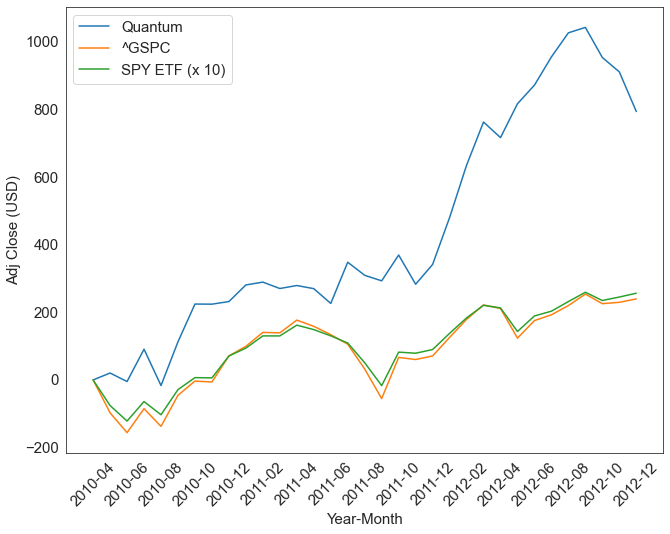

In [4]:
sns.set_style('white')
fig = plt.figure(figsize=(10.708,8.2))
plt.rc('font', size=15)
sns.lineplot(x='ym', y='Value2', data=df, label='Quantum')
sns.lineplot(x='ym', y='Base', data=df, label='^GSPC')
sns.lineplot(x='ym', y='Adj Close2', data=df, label='SPY ETF (x 10)')
plt.xticks(['2010-04', '2010-06', '2010-08', '2010-10', '2010-12', '2011-02', '2011-04', '2011-06', '2011-08', '2011-10', '2011-12', '2012-02', '2012-04', '2012-06', '2012-08', '2012-10', '2012-12'],rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Adj Close (USD)')
plt.legend()
plt.show()
fig.savefig(figure_path+'run9_comparison.png')

### Combined runs: 21, 22, 23

In [5]:
base_path ='../results/run21/'
figure_path = '../figures/'
dates = ['2018-10-01', '2020-01-01']
update_values = pd.read_pickle(base_path+'opt_results_df.pkl')
initial_budget = update_values.loc[1, 'Value']
update_values['Value2'] = update_values['Value'] - initial_budget
baseline = pd.read_pickle(base_path+'df_baseline.pkl').reset_index()
baseline['Date'] = baseline.Date.astype('str')
#with open(base_path+'baseline_values.txt') as f:
#    baseline2 = f.read()
baseline2 = [0.0, 29.728889, 48.186014, 89.393873, 17.736015, 87.888726, 102.170695, 82.230633, 100.82463, 123.316426, 161.562023, 194.770871]
tmp = pd.DataFrame({'ym':['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'], 'base2': baseline2})

df21 = update_values.merge(baseline, left_on='Date', right_on='Date', how='inner')
df21['Base'] = df21['^GSPC'] - df21.loc[0, '^GSPC']
df21['ym'] = df21.Date.map(lambda x: x[:7])
df21 = df21.merge(tmp, left_on='ym', right_on='ym')
df21

,Date,Value,AAPL,MSFT,AAL,WMT,Variance,Returns,Value2,^GSPC,Base,ym,base2
0,2019-01-31,989.208374,0,5,1,5,2811.52,-7.26,0.000000,2704.100098,0.000000,2019-01,0.000000
1,2019-02-28,1037.939102,0,7,0,3,3730.52,11.79,48.730728,2784.489990,80.389893,2019-02,29.728889
2,2019-03-29,1075.295929,0,7,0,3,3196.71,17.84,86.087555,2834.399902,130.299805,2019-03,48.186014
3,2019-04-30,1176.064903,0,7,0,3,4479.40,34.97,186.856529,2945.830078,241.729980,2019-04,89.393873
4,2019-05-31,1129.881836,0,7,0,3,4266.60,22.27,140.673462,2752.060059,47.959961,2019-05,17.736015
5,2019-06-28,1225.561684,0,7,0,3,5089.56,34.09,236.353310,2941.760010,237.659912,2019-06,87.888726
6,2019-07-31,1240.939453,0,7,0,3,4622.00,32.48,251.731079,2980.379883,276.279785,2019-07,102.170695
7,2019-08-30,1267.546341,0,7,0,3,4269.31,32.50,278.337967,2926.459961,222.359863,2019-08,82.230633
8,2019-09-30,1288.206474,0,7,0,3,3957.73,31.87,298.998100,2976.739990,272.639893,2019-09,100.824630
9,2019-10-31,1313.711174,0,7,0,3,3777.92,32.09,324.502800,3037.560059,333.459961,2019-10,123.316426


In [10]:
base_path ='../results/run22/'
figure_path = '../figures/'
dates = ['2018-10-01', '2020-01-01']
update_values = pd.read_pickle(base_path+'opt_results_df.pkl')
initial_budget = update_values.loc[1, 'Value']
update_values['Value2'] = update_values['Value'] - initial_budget
baseline = pd.read_pickle(base_path+'df_baseline.pkl').reset_index()
baseline['Date'] = baseline.Date.astype('str')
df22 = update_values.merge(baseline, left_on='Date', right_on='Date', how='inner')
df22['Base'] = df22['^GSPC'] - df22.loc[0, '^GSPC']
df22['ym'] = df22.Date.map(lambda x: x[:7])
print(df22.columns.values)

['Date' 'Value' 'AAPL' 'MSFT' 'WMT' 'AAL' 'LDOS' 'INTU' 'HIG' 'SWKS'
 'FAST' 'CERN' 'NDAQ' 'RHI' 'ETR' 'AOS' 'VNO' 'CPT' 'HPE' 'EFX' 'AVGO'
 'DLTR' 'MLM' 'PSA' 'TXN' 'ALB' 'NVDA' 'AVB' 'DRE' 'TTWO' 'LYB' 'NCLH'
 'RCL' 'FISV' 'EQR' 'STX' 'TECH' 'RTX' 'D' 'EMR' 'LRCX' 'SLB' 'ALGN' 'IEX'
 'WTW' 'EXR' 'FIS' 'COO' 'UDR' 'BBY' 'NWSA' 'EPAM' 'Variance' 'Returns'
 'Value2' '^GSPC' 'Base' 'ym']


In [9]:
base_path ='../results/run23/'
figure_path = '../figures/'
dates = ['2018-10-01', '2020-01-01']
update_values = pd.read_pickle(base_path+'opt_results_df.pkl')
initial_budget = update_values.loc[1, 'Value']
update_values['Value2'] = update_values['Value'] - initial_budget
baseline = pd.read_pickle(base_path+'df_baseline.pkl').reset_index()
baseline['Date'] = baseline.Date.astype('str')
df23 = update_values.merge(baseline, left_on='Date', right_on='Date', how='inner')
df23['Base'] = df23['^GSPC'] - df23.loc[0, '^GSPC']
df23['ym'] = df23.Date.map(lambda x: x[:7])
print(df23.columns.values)

['Date' 'Value' 'AAPL' 'MSFT' 'AAL' 'WMT' 'MMM' 'AIG' 'GOOGL' 'AMD' 'BLK'
 'KO' 'GE' 'GM' 'INTC' 'JNJ' 'JPM' 'CMCSA' 'MA' 'MCD' 'NDAQ' 'PFE'
 'Variance' 'Returns' 'Value2' '^GSPC' 'Base' 'ym']


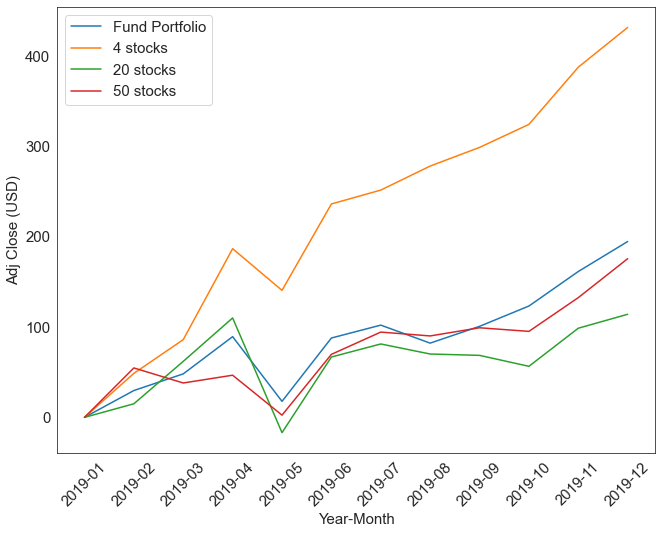

In [8]:
sns.set_style('white')
fig = plt.figure(figsize=(10.708,8.2))
plt.rc('font', size=15)
sns.lineplot(x='ym', y='base2', data=df21, label='Fund Portfolio')
sns.lineplot(x='ym', y='Value2', data=df21, label='4 stocks')
sns.lineplot(x='ym', y='Value2', data=df22, label='20 stocks')
sns.lineplot(x='ym', y='Value2', data=df23, label='50 stocks')
plt.xticks(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Adj Close (USD)')
plt.legend()
plt.show()
fig.savefig(figure_path+'compare-21-22-23.png')